# Milestone 3

# Analysis of the data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import findspark
findspark.init()

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pyspark
from pyspark.sql import *

In [4]:
spark = SparkSession.builder.getOrCreate()
%matplotlib inline

In [5]:
from local.helper import *

## Major actors

* *What are the major actors (person, organisation, country) involved in environment-related events?*

We would like to plot the top persons, organizations and locations, that is the actors that are the most cited by the media, in order to see which one have the strongest influence on environmental news.

For Milestone 2, we used the Actor fields of the GdeltEvent database. However, it turned out that a lot of results were irrelevant (see Milestone2.ipynb). We then thought it could be better to use the V1LOCATIONS, V1PERSONS and V1ORGANIZATIONS of the GKG database. The results obtained for the overall top-actors are presented below.

In [6]:
DATA_PATH = "data/from_cluster/worldcloud_actors/"

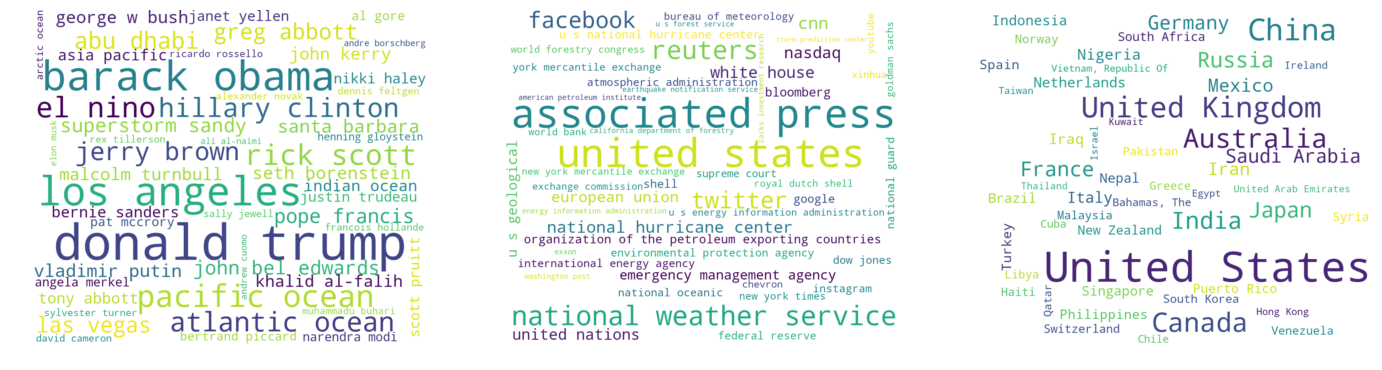

In [7]:
fig = plt.figure(figsize=(24, 8))
wordcloud_persons(DATA_PATH, 50, None, fig, 131)
wordcloud_organizations(DATA_PATH, 50, None, fig, 132)
wordcloud_countries(DATA_PATH, 50, None, fig, 133)

In order to generate these wordcloud, we use the [WordCloud](https://amueller.github.io/word_cloud/) library.

For the persons wordcloud, we simply group_by the actors names and then count the number of occurences in the whole dataset. We do the same for the organizations wordcloud. For the countries wordcloud, we do the same by filtering the V1LOCATIONS on the first number which is 1 in case of a country.

We can note that "pacific ocean", "el nino", "los angeles" and others are wrongly treated as persons. Overall, the results obtained with the GKG database seem a lot more relevant for our problem. 

The first thing we can observe is that the dataset is clearly dominated by American actors which are over-represented in these wordclouds. This comes from the database itself which contains news coming mostly from american news agencies (such as associated press which appears a lot, as seen in the organizations wordcloud).

A lot of politicians appears in the persons wordcloud. There are also mentions of ocean and storm (such as "El Nino" or "Superstorm Sandy") which comes from the natural disaster events we have kept in the GKG database. We can also see names of influential businessman such as André Borschberg (former student at EPFL!) and Elon Musk who acted a lot for environment.

In the organizations wordcloud, big U.S. organizations are present such as associated press. A lot of articles seem to come from this news agency. There are also a lot of environment-related organizations (atmospheric administration, national, weather service, organizations of the petroleum exporting countries). We can also notice the presence of big oil companies (shell, exxon and chevron among others) which are linked to energy, mining operation, and perhaps environment scandals (TODO à vérifier).

In the countries wordcloud, the major countries are represented. There are also mention of other smaller countries where disasters happened, such as Malaysia, The Bahamas, Chile... (TODO: relate them to events)

## Co-occurence graph

* *How strong is the link between them? Is there a type of actor that is more predominant than others?*

We would like to draw a co-occurence graph to see how persons and organizations are connected, as well as their predominance in the environment-related news.

We use the previously computed occurence_persons.csv and occurence_organizations.csv to plot the nodes size according the occurence of an actor. To plot the edges, we count the number of times two actors are mentioned together in an article in the GKG database.

We use [NetworkX](https://networkx.github.io/documentation/stable/) for plotting the graph.

Organizations are printed in orange, persons in green. The stronger the co-occurence, the larger the edges.

The graph for the top 25 persons and top 25 organizations is printed below.

In [8]:
DATA_PATH = "data"

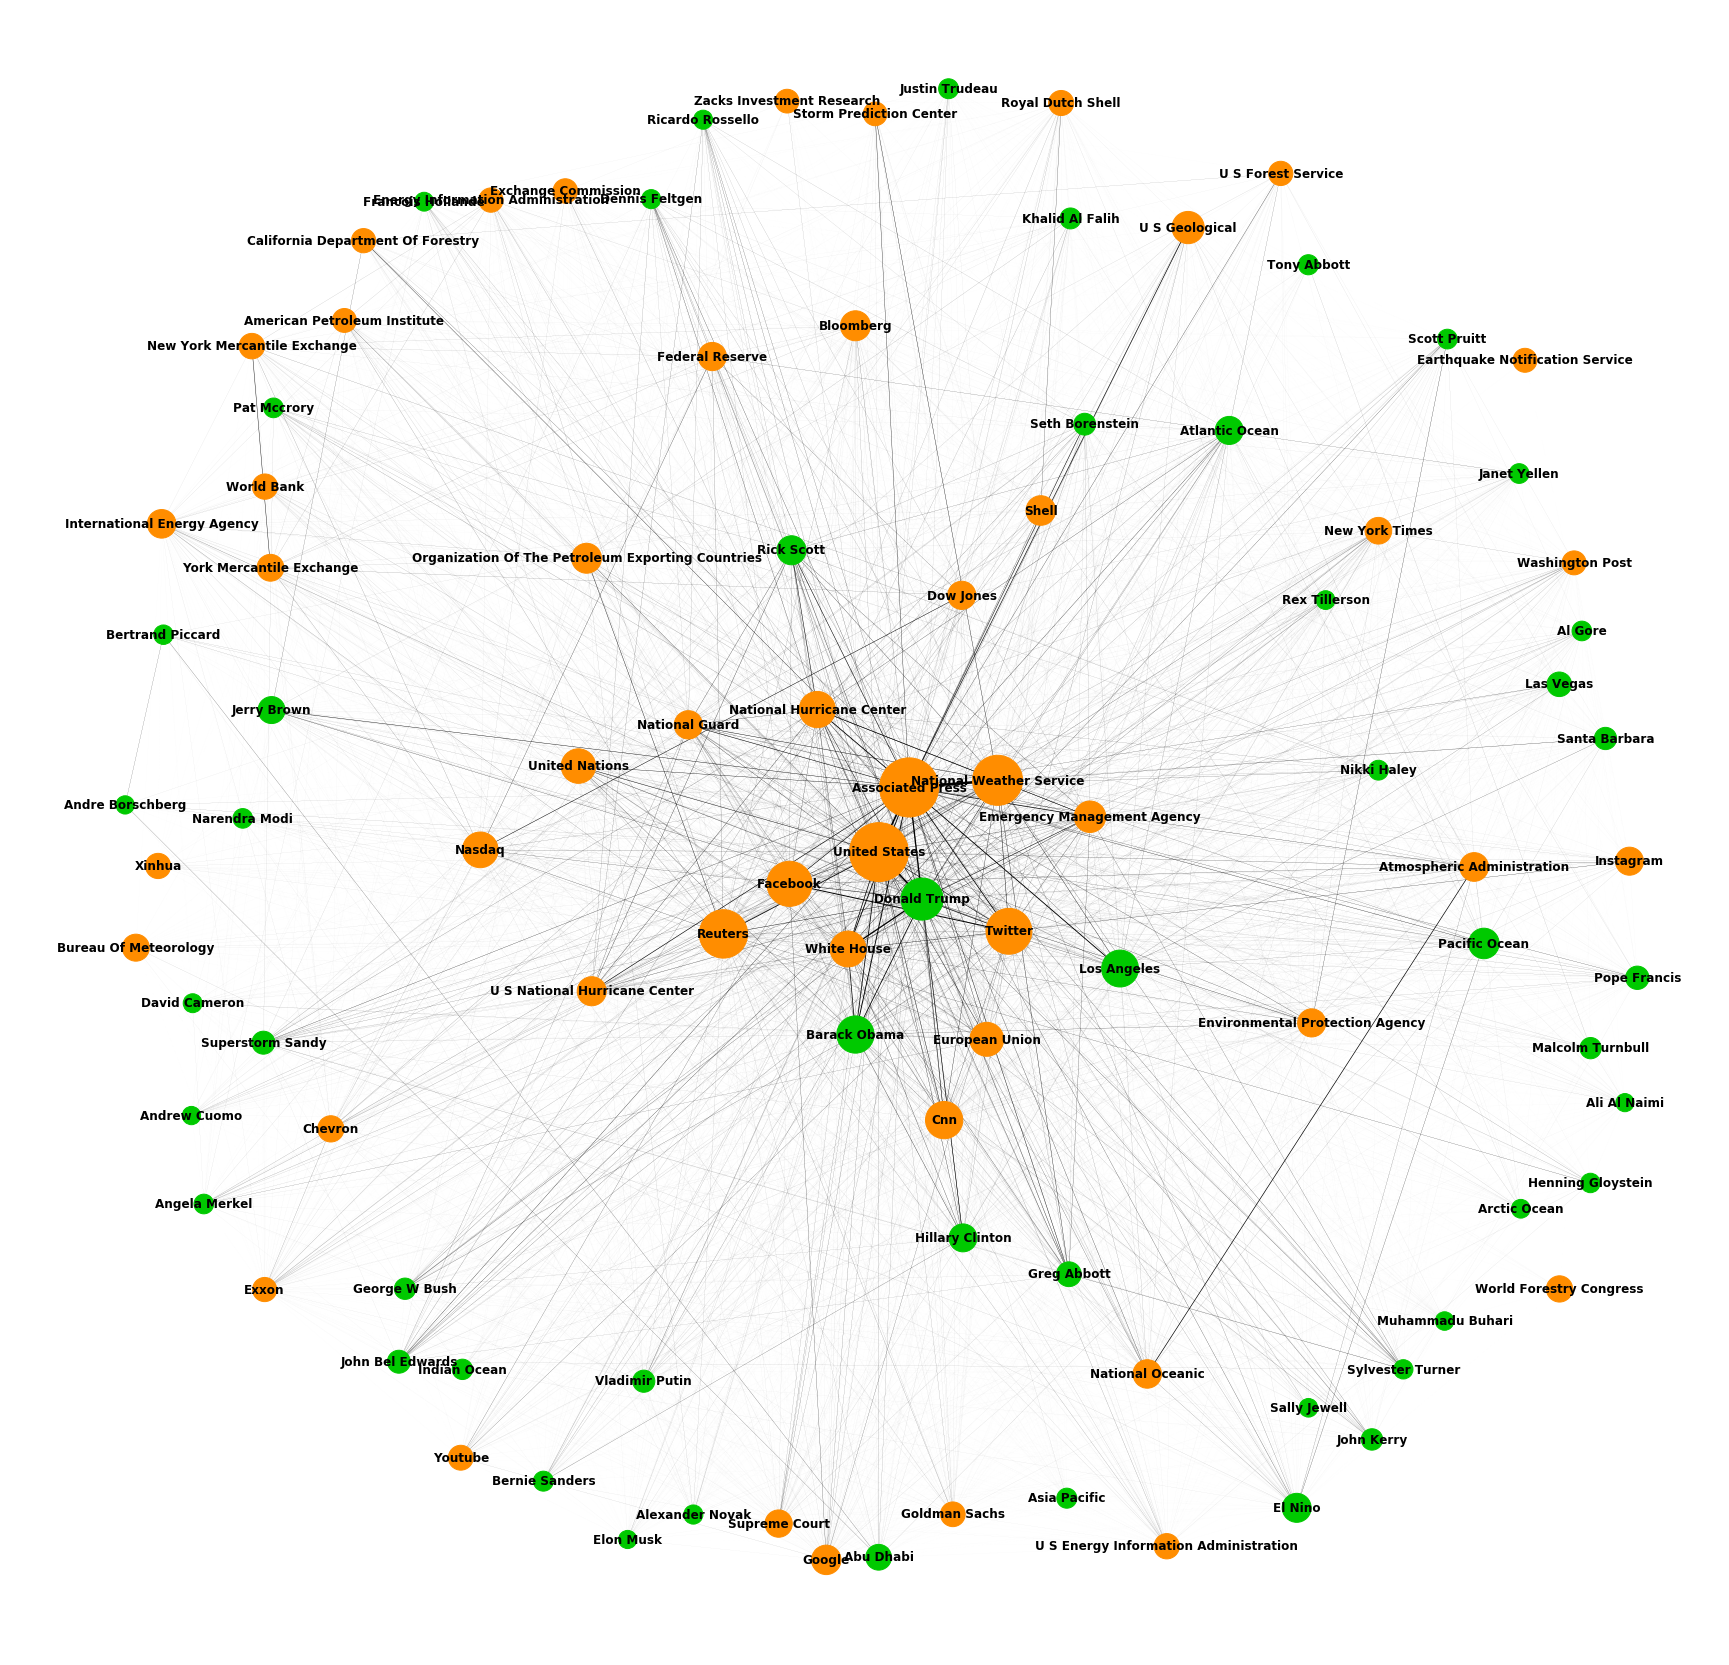

In [21]:
plot_occ_graph(DATA_PATH, 'global_actors_co-occurences_50.zip', 50, 0.01, 0.6, 8.5, 30)